<a href="https://colab.research.google.com/github/woo9599/DataScience/blob/main/pratice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1) 히스토그램을 활용한 최고기온, 최저 기온, 평균기온 분포 확인하기
#2) 상자그림을 활용한 최고 기온 vs 서울 최고 기온
#3) 월별 최고기온 상자 그림 그리기
#4) 특정 달의 일별 최고 기온 상자 그림 그리기


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


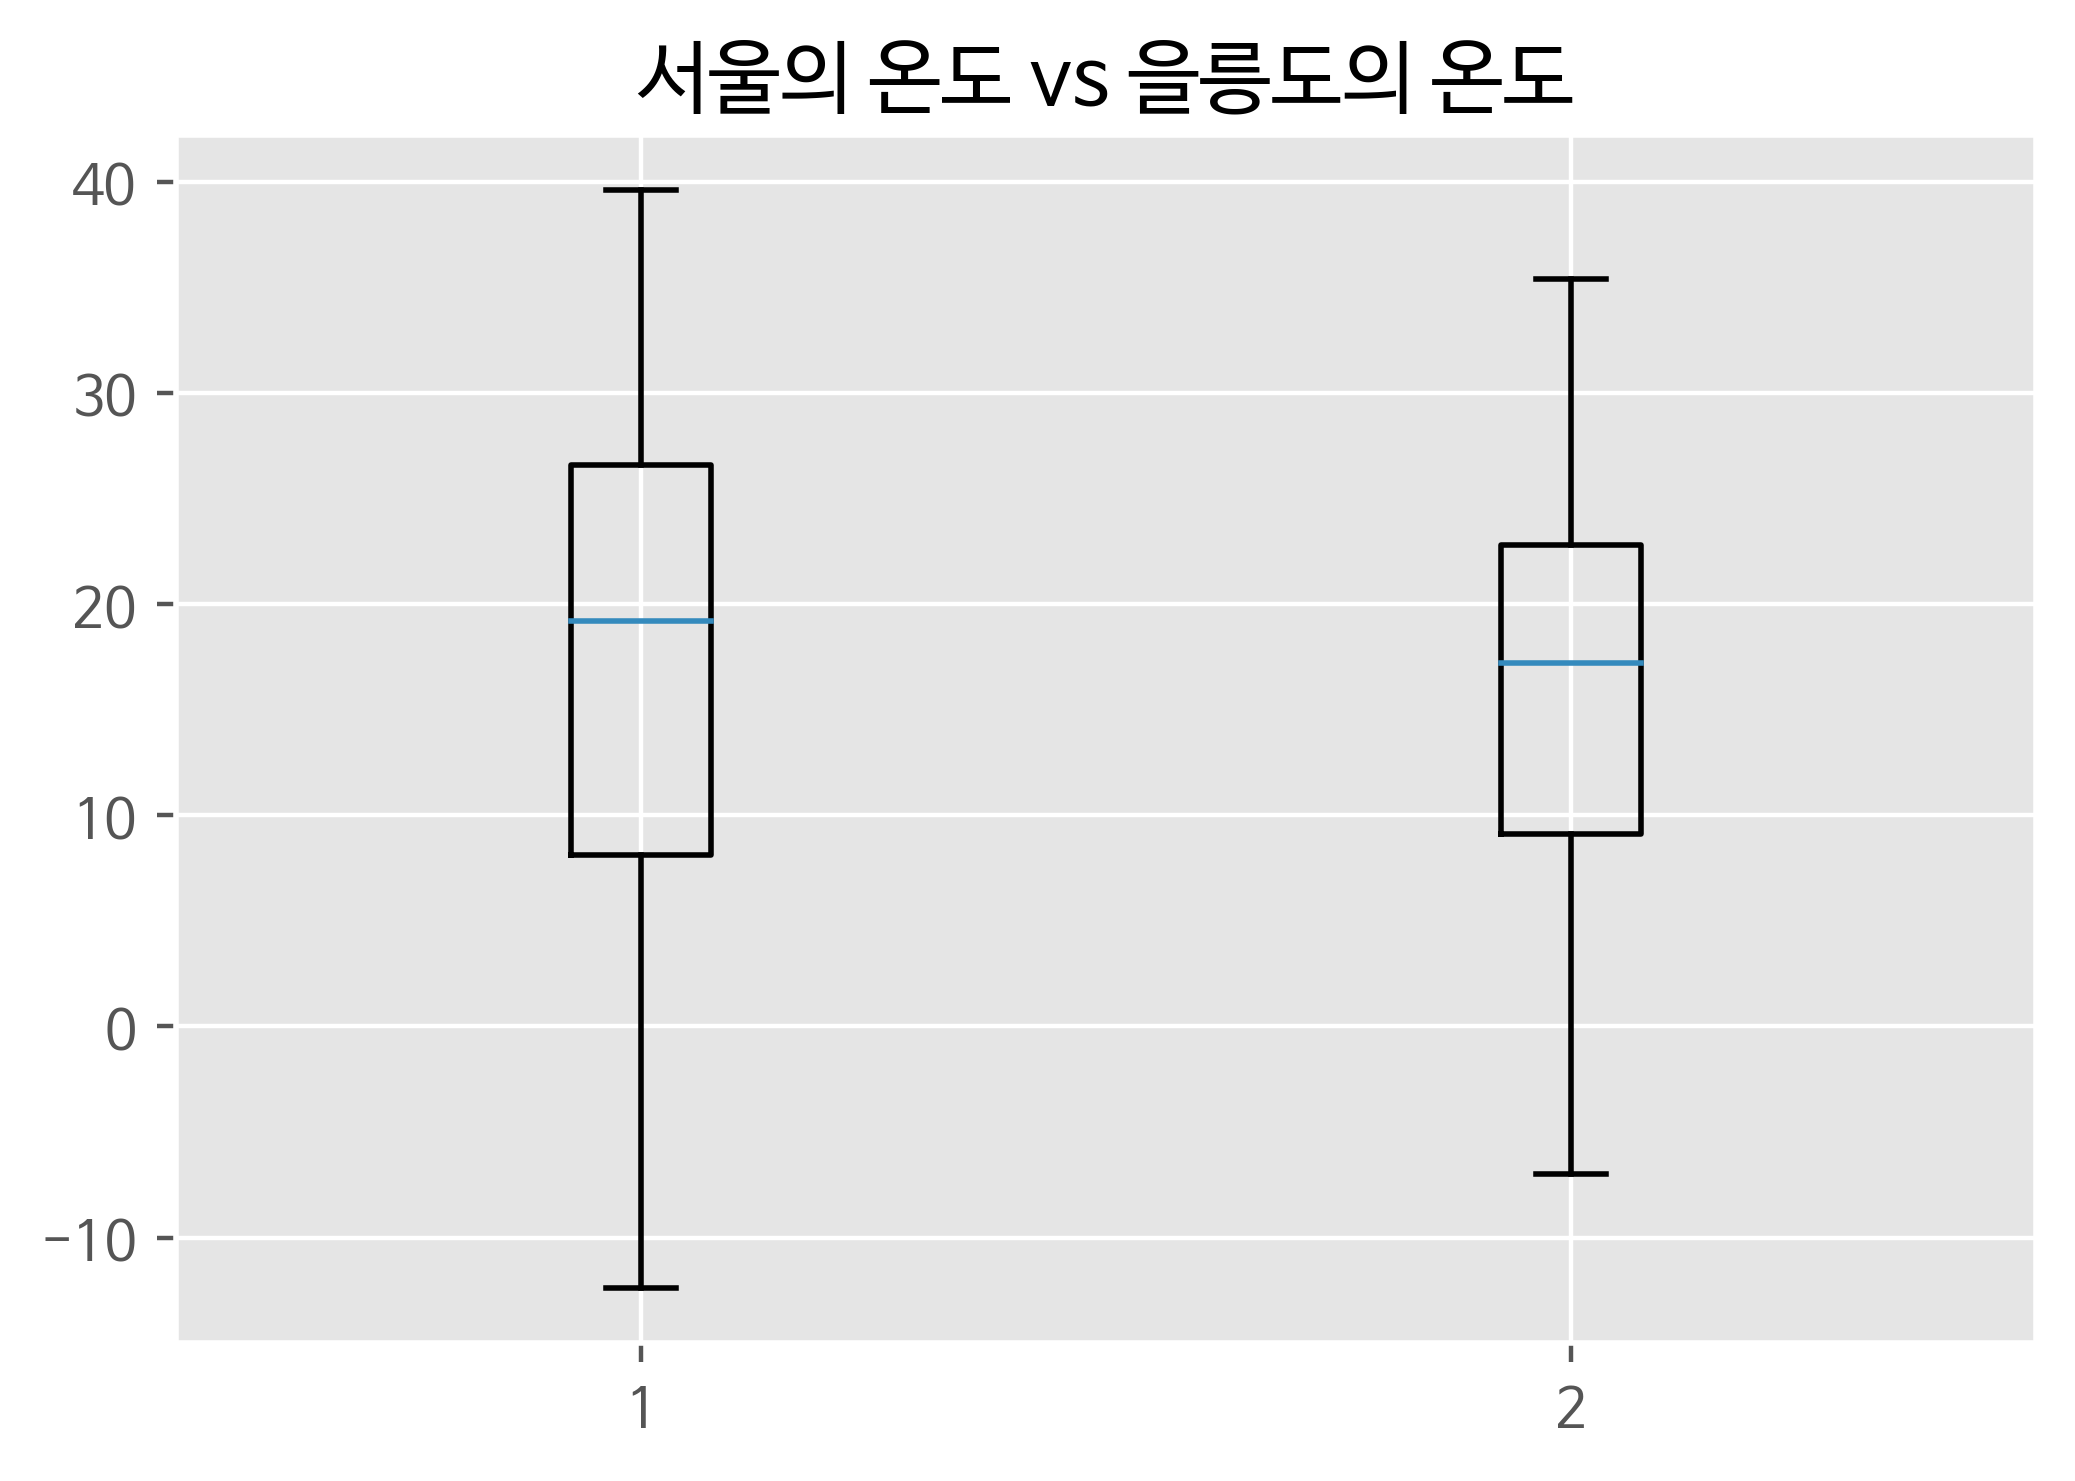

In [ ]:
#2번
import csv
import matplotlib.pyplot as plt


f1 = open('/content/seoul.csv',encoding= 'cp949')
f2 = open('/content/ulleung.csv',encoding ='cp949')

data1 = csv.reader(f1)
data2 = csv.reader(f2)
next(data1) #헤더
next(data2)

result1 = [] # 서울의 최고 기온 담기   
result2 = [] # 을릉도의 최고 기온 담기 

for row in data1:
  year = int(row[0].split('-')[0]) # year 변수에 날짜를 '-'로 스플릿 한 후 저장 
  if row[-1] != '':
    if year >= 1990:  # 을릉도 데이터는 1970년대 부터 뽑았기 때문에 서울데이터도 1970년 부터 추출  
      result1.append(float(row[-1]))

for row in data2:
  year = int(row[0].split('-')[0])
  if row[-1] != '':
    if year < 2020:
      result2.append(float(row[-1]))

plt.figure(dpi=200)
plt.title('서울의 온도 vs 을릉도의 온도')
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.boxplot([result1,result2])
plt.style.use('ggplot')# 그래프 스타일 지정
plt.show()

In [ ]:
#한글깨짐 처리하기

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


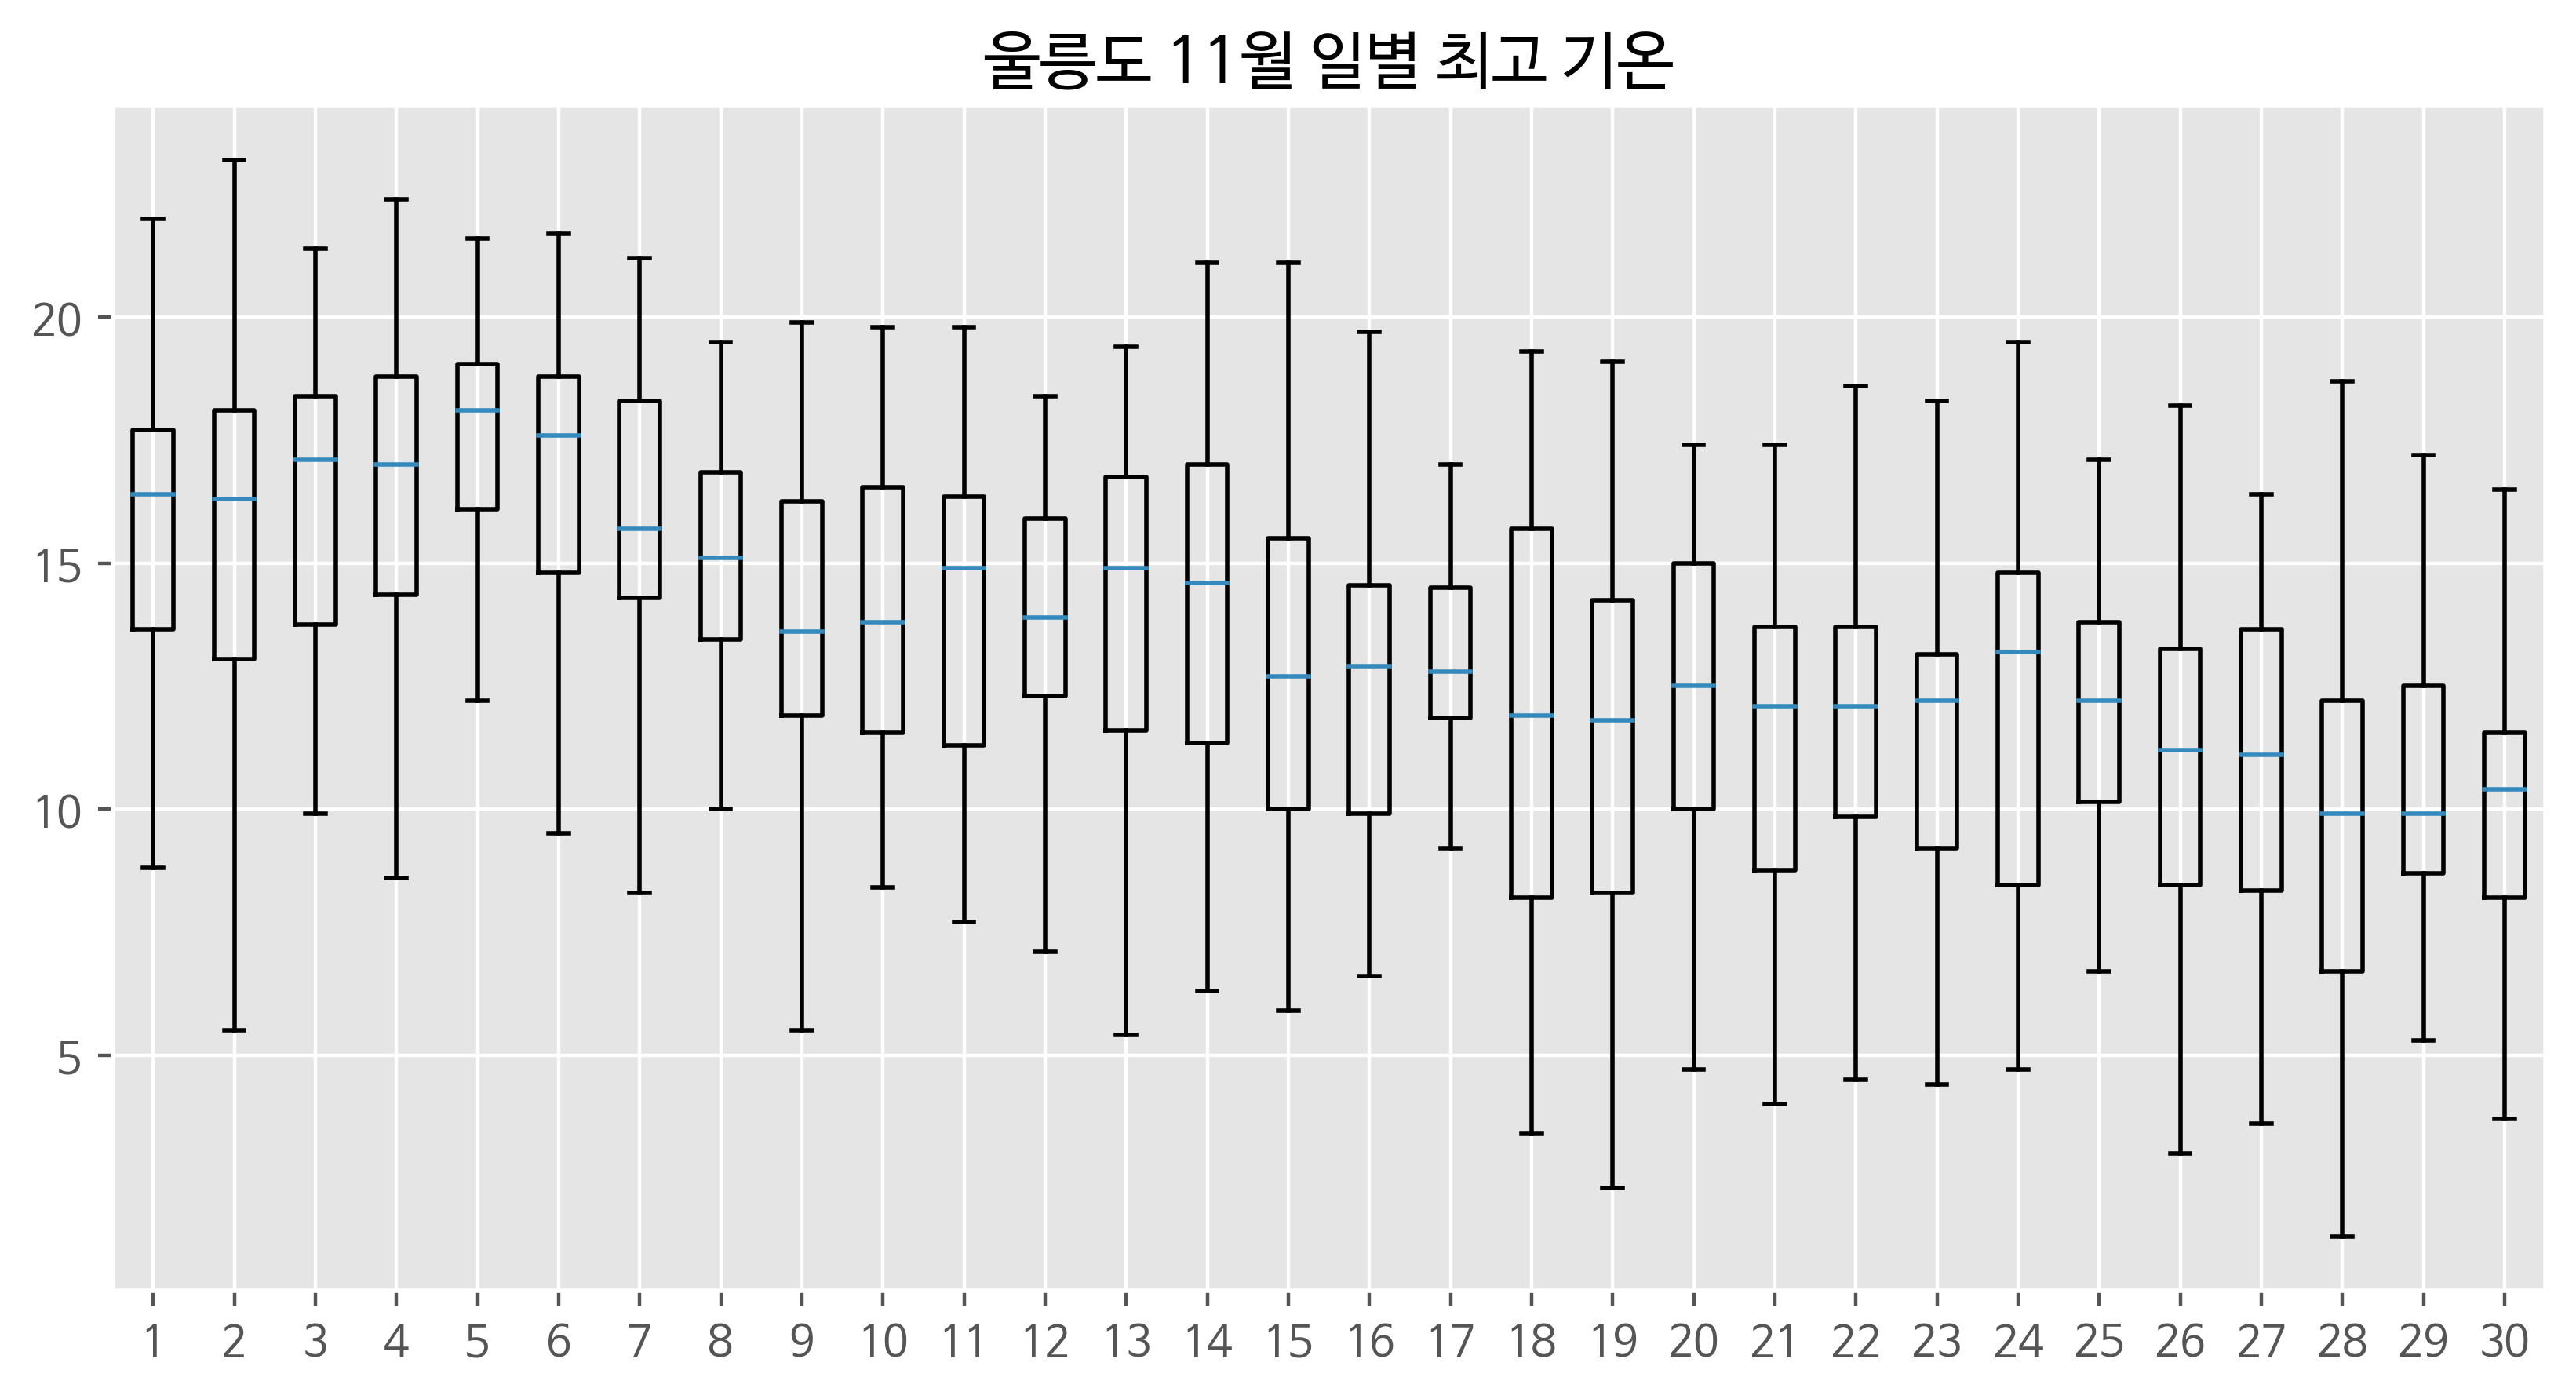

In [ ]:
#4번 

import csv
import matplotlib.pyplot as plt

f = open('/content/ulleung.csv', encoding='cp949')
data = csv.reader(f)
next(data)

day = [] #일별 데이터를 저장할 리스트 day 변수 선언
for i in range(30) : #11월은 30일까지만 있음
  day.append([]) #day 리스트 내에 31개 리스트 생성[[], [], [], [],...31개]

for row in data:
  if row[-1] != '' : #row[-1] : 최고기온
    if row[0].split('-')[1] == '11' : # 11월 최고 기온 값 저장 day[0] -> 1일
       day[int(row[0].split('-')[2])-1].append(float(row[-1]))
 


#<<차트 설정>>
plt.figure(figsize=(10,5), dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.title('울릉도 11월 일별 최고 기온')
plt.boxplot(day, showfliers=False) #아웃라이터(이상치) 값 생략 showfliers
plt.style.use('ggplot') #ggplot 격자문의 회색 그래프
plt.show()

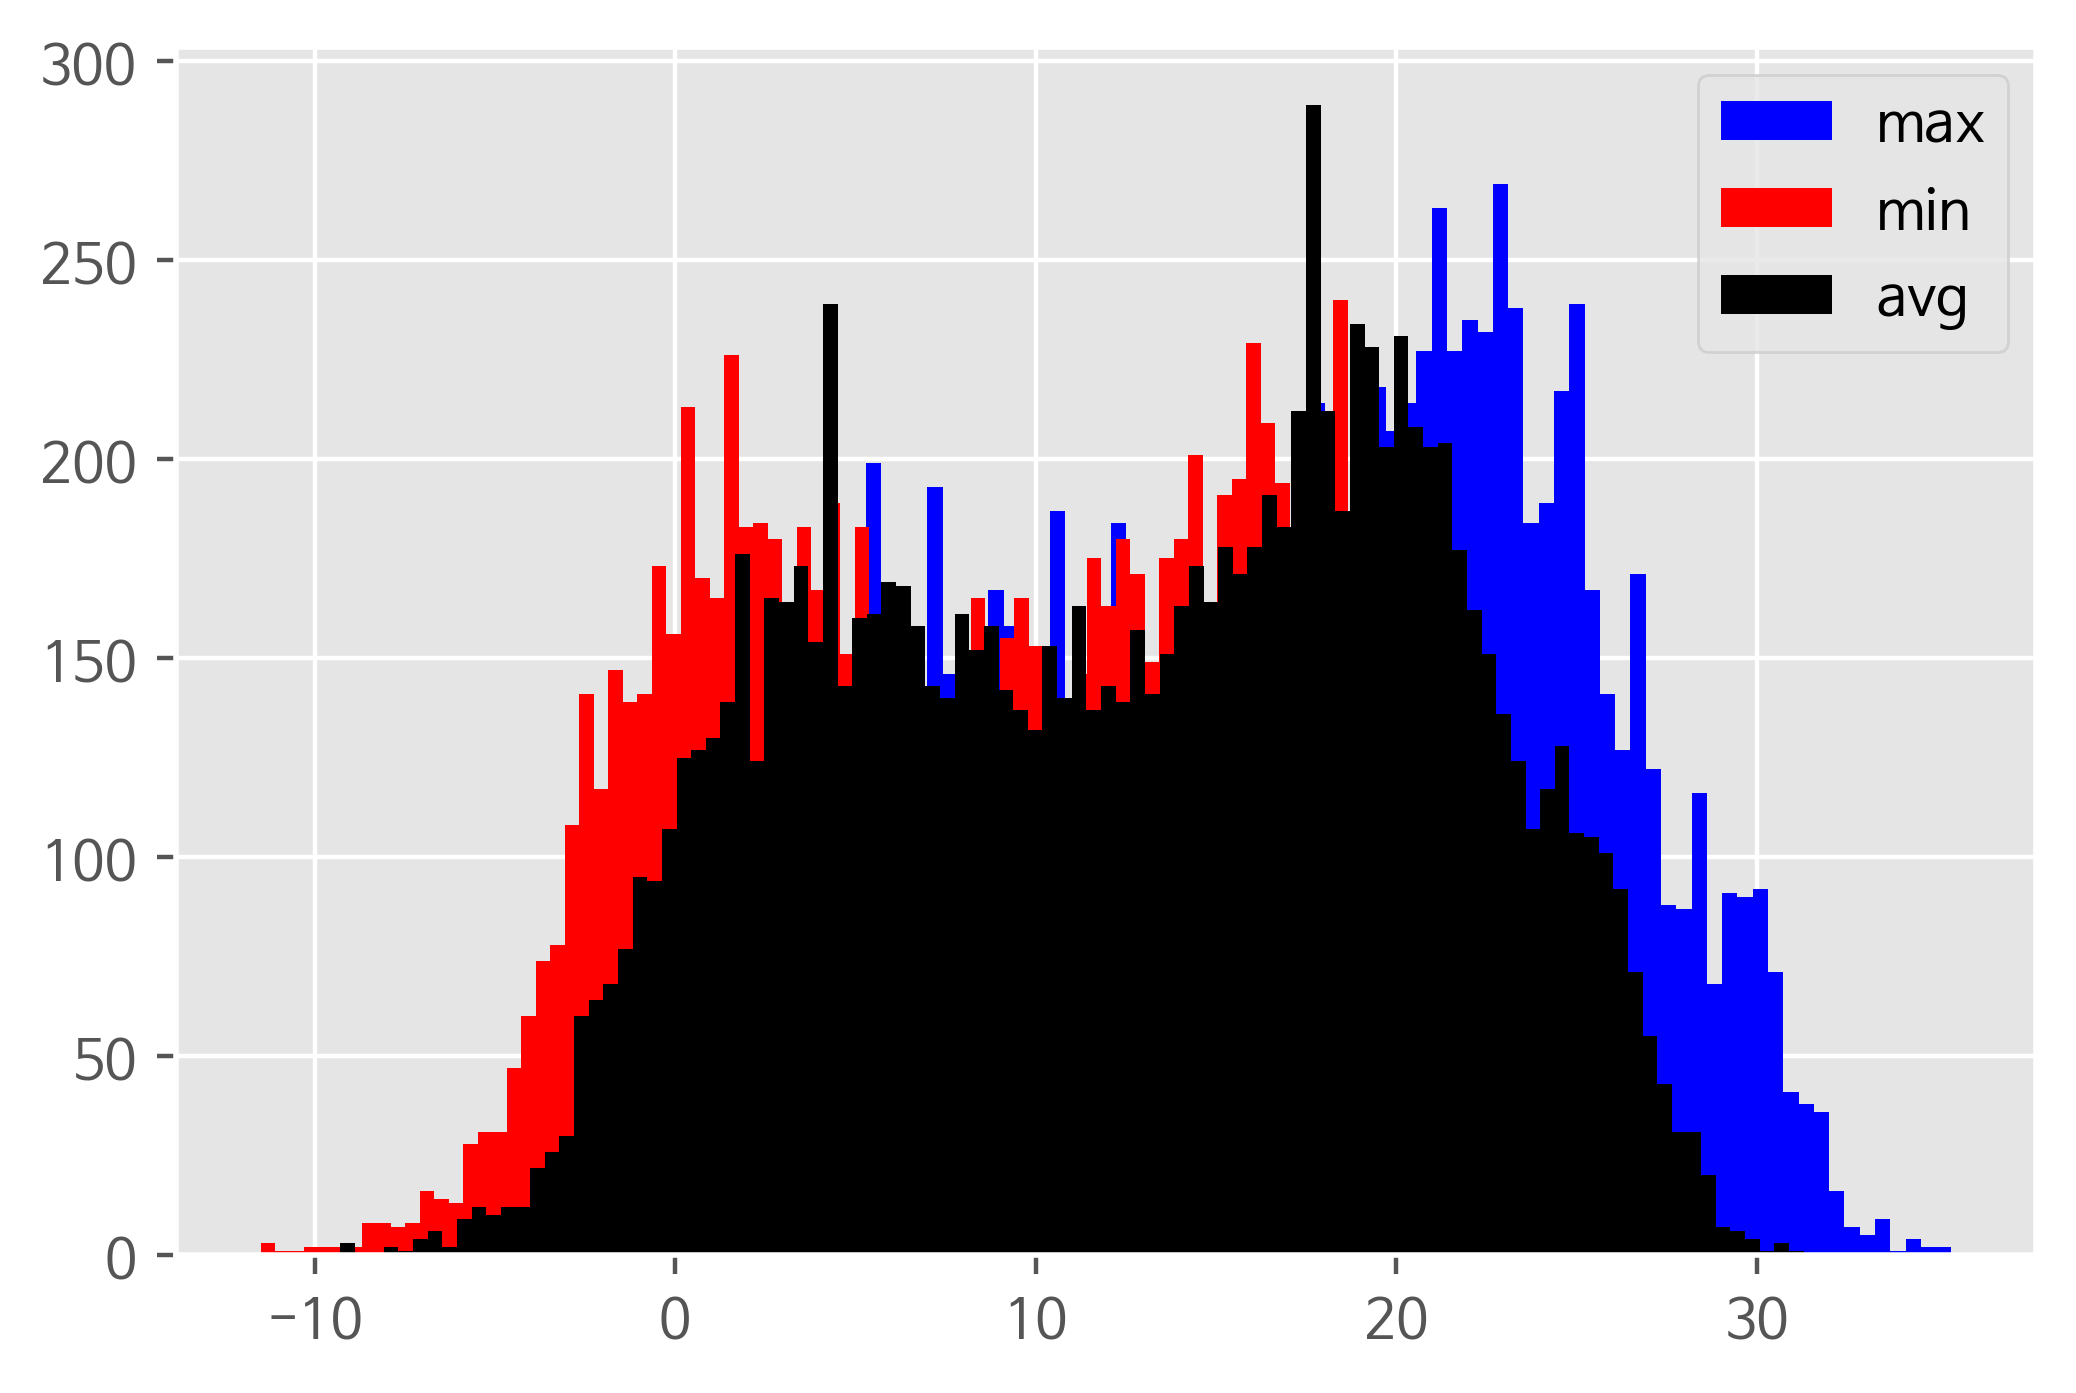

In [ ]:
#1) 히스토그램을 활용한 최고기온, 최저 기온, 평균기온 분포 확인하기

import csv
import matplotlib.pyplot as plt


f = open('/content/ulleung.csv',encoding= 'cp949')

data = csv.reader(f)
next(data) #헤더

max = [] #최고 기온을 담을 max 리스트 변수 선언
min = [] #최저 기온을 담을 min 리스트 변수 선언
avg = [] #평균 기온을 담을 avg 리스트 변수 선언

for row in data:
  if row[-1] != '':
    max.append(float(row[-1]))
    if row[-2] != '' : 
      min.append(float(row[-2]))
      if row[-3] != '' : 
        avg.append(float(row[-3]))

plt.figure(dpi=200)
plt.hist(max,bins=100,color ='b', label="max") 
plt.hist(min,bins=100,color='r', label="min")
plt.hist(avg,bins=100,color='k', label="avg")
plt.legend() 
plt.show()


In [ ]:
#3) 월별 최고기온 상자 그림 그리기



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


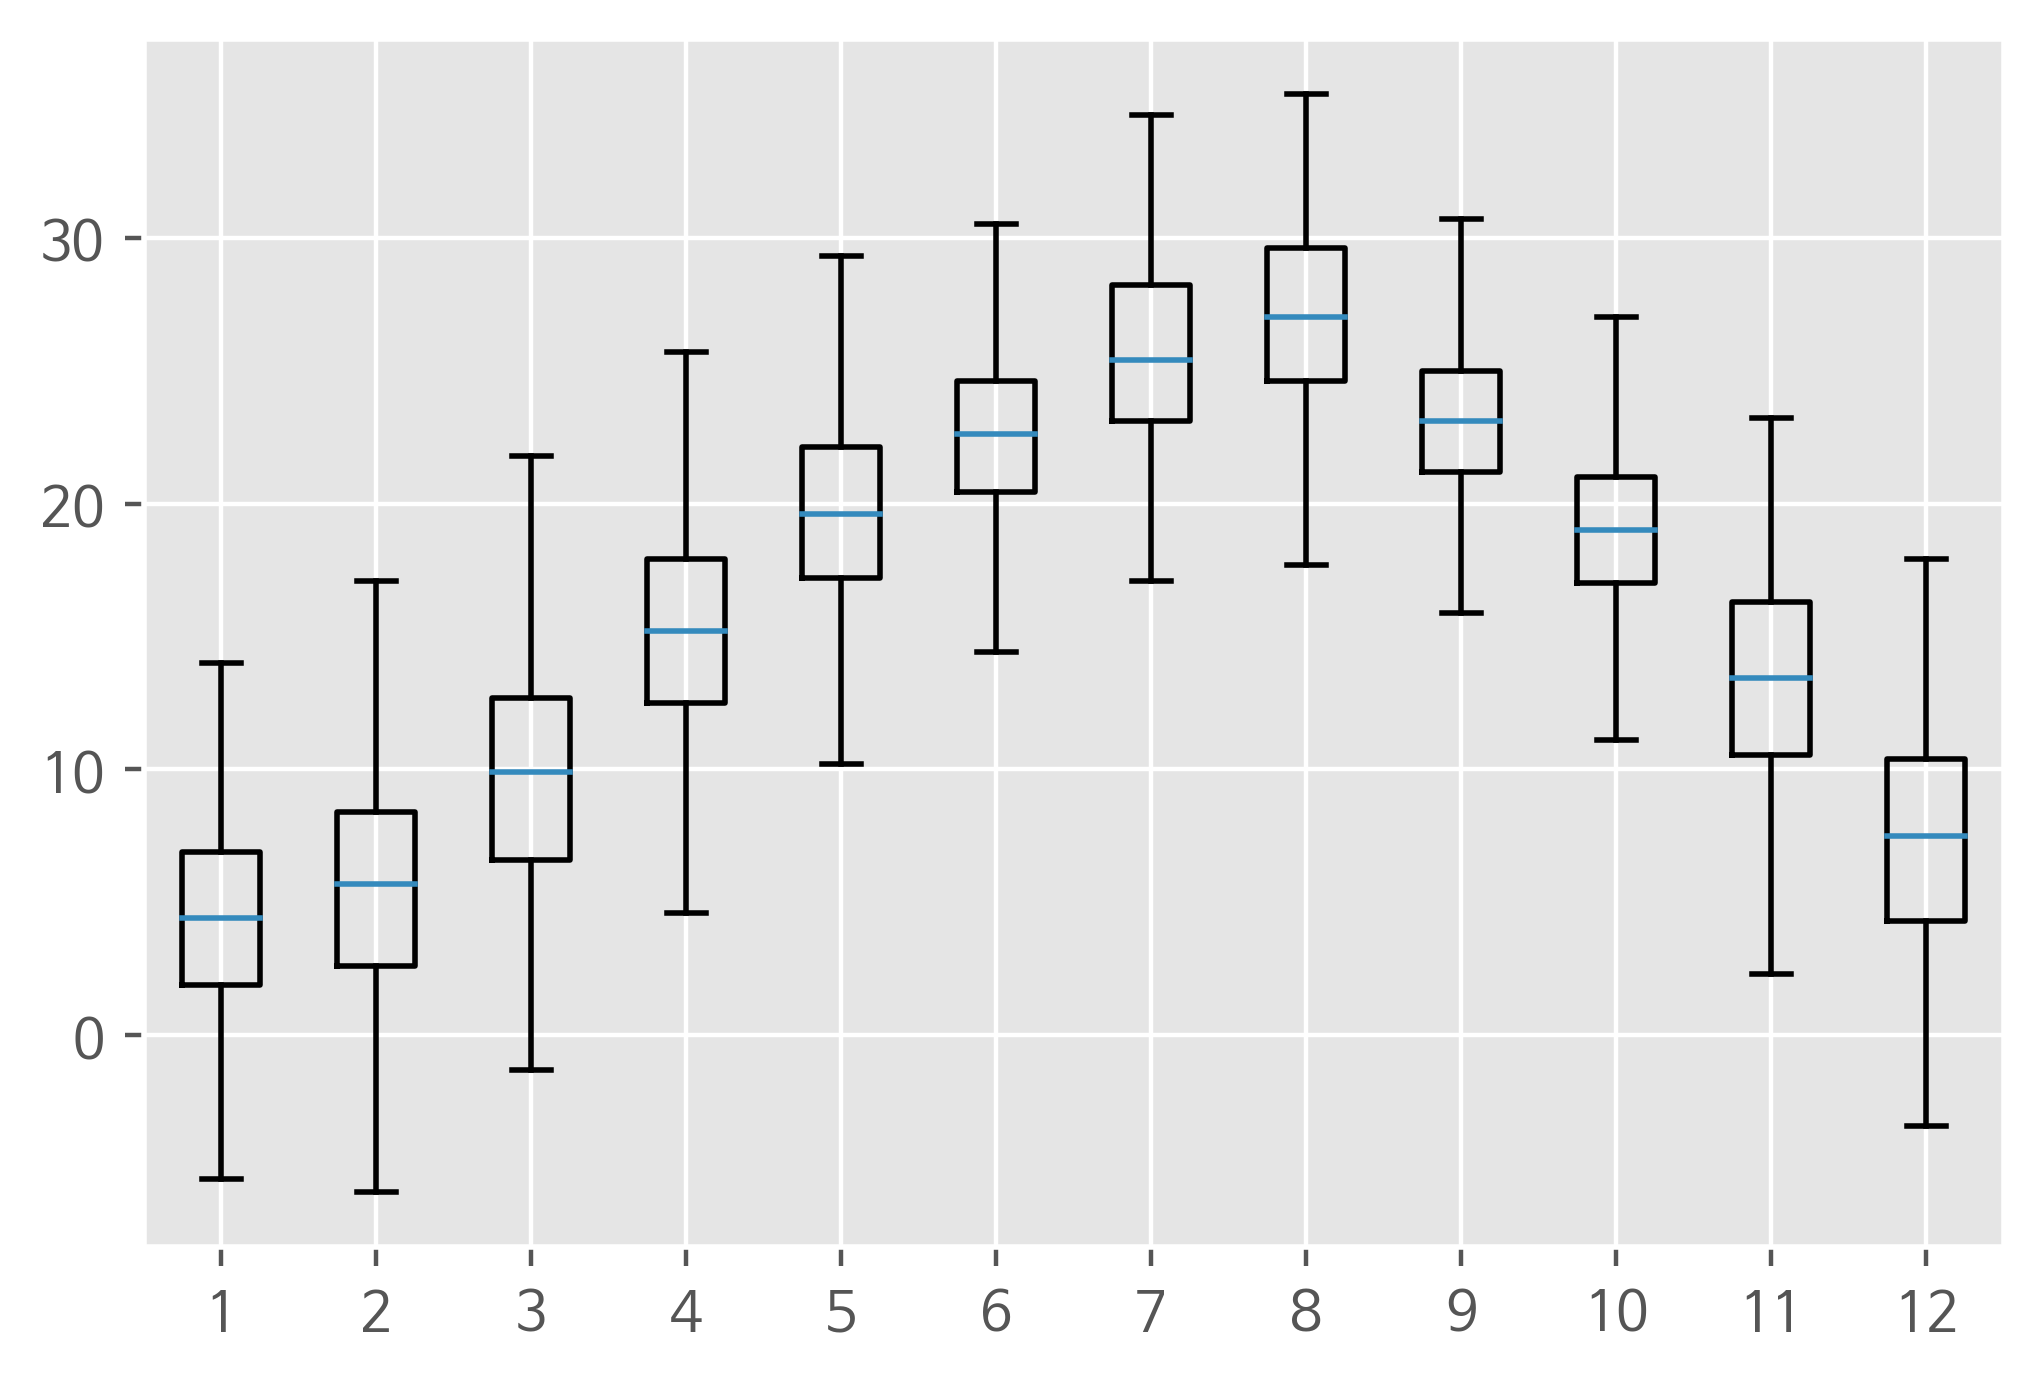

In [ ]:
import csv
import matplotlib.pyplot as plt


f = open('/content/ulleung.csv',encoding= 'cp949')

data = csv.reader(f)
next(data) #헤더

month = [] # 일별 데이터를 저장할 리스트 day 변수 선언
for i in range(12) :
  month.append([]) # 리스트 내에 12개 리스트 생성([],[],[],[]...31개)

#month = [[],[],[],[],[],[],[],[],[],[],[],[]]# 월별 데이터 저장할 month변수 선언

for row in data:
  if row[-1] != '':
    month[int(row[0].split('-')[1])-1].append(float(row[-1])) 

    
plt.figure(dpi=200)
plt.boxplot(month, showfliers=False)
plt.show()